# Analysis Result Visualization

#### Package Importing

In [1]:
import os
import ipywidgets as widgets
from IPython.display import display
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Showing Result file Dropdown
Run code below and select an Excel result file.

Then proceed to next code cell.

In [2]:
res_path = '../res/'
select_excel_path = ''
excels = [res_path + folder + f'/{folder}_result.xlsx' for folder in os.listdir(res_path) if os.path.isdir(os.path.join(res_path, folder))]
print(excels)
file_dropdown = widgets.Dropdown(
    options=excels,
    description='Select result file:',
    disabled=False,
)

def on_file_select(change):
    global select_excel_path
    selected_file = change['new']
    file_path = os.path.join(res_path, selected_file)
    select_excel_path = file_path

# Connect to event handler
file_dropdown.observe(on_file_select, names='value')

# Display dropdown
display(file_dropdown)

['../res/20240613_153639/20240613_153639_result.xlsx', '../res/20240613_154212/20240613_154212_result.xlsx']


Dropdown(description='Select result file:', options=('../res/20240613_153639/20240613_153639_result.xlsx', '..…

In [4]:
# Load Excel file
workbook = openpyxl.load_workbook(select_excel_path)

# Select first sheet
sheet = workbook.active

# Convert data into DataFrame
data = sheet.values
columns = next(data)  # Use first row as column names
df = pd.DataFrame(data, columns=columns)
print(df['Wafer'])

0     D07
1     D07
2     D07
3     D07
4     D07
     ... 
93    D24
94    D24
95    D24
96    D24
97    D24
Name: Wafer, Length: 98, dtype: object


In [5]:
def plot_by_wafer(axis, wafers, data_by_wafer, /, title, ylabel):
    # Map categories to numbers
    category_mapping = {category: index for index, category in enumerate(wafers)}
    for category, values in data_by_wafer.items():
        x = [category_mapping[category]] * len(values)  # Set all values to the index of their category
        axis.errorbar(x, values, label=category, fmt='o', capsize=5, markersize=8, linestyle='-')

    # Set horizontal axis to category name
    axis.set_xticks(ticks=range(len(wafers)), labels=wafers)
    axis.set_title(title)
    axis.set_xlabel('Wafer')
    axis.set_ylabel(ylabel)
    # axis.legend(title='Wafer')
    axis.grid(True)

In [6]:
wafers = sorted(set(df['Wafer']))
ref_rsquared = {wafer: list(df.loc[df['Wafer'] == wafer, 'Rsq of Ref. spectrum (6th)']) for wafer in wafers}
ref_max_transmission = {wafer: list(df.loc[df['Wafer'] == wafer, 'Max transmission of Ref. spectrum (dBm)']) for wafer in wafers}


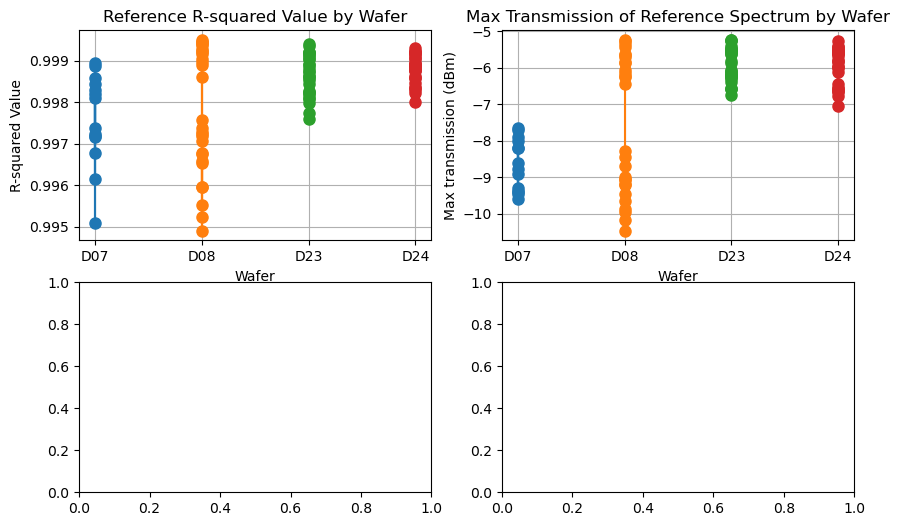

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6))
plot_by_wafer(ax1, wafers, ref_rsquared, title='Reference R-squared Value by Wafer', ylabel='R-squared Value')
plot_by_wafer(ax2, wafers, ref_max_transmission, title='Max Transmission of Reference Spectrum by Wafer', ylabel='Max transmission (dBm)')